In [193]:
1+1

2

In [194]:
%reset -f

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import hydroeval

b=[1,2,3,]
c=[1,1,1]
a=[[1,0.3,0.2]
   ,[0.3,1,0.5]
   ,[0.2,0.5,1]]


Nx=10000
np.random.normal([b,c],Nx)

d=np.random.multivariate_normal(b,a,Nx)

print('d is 3x100 matrix')
display(pd.DataFrame(d))

cov_mat=np.cov(d,rowvar=False)
print('covariance matrix')
display(pd.DataFrame(cov_mat))

d0=d[:,0]
d1=d[:,1]
d2=d[:,2]

print('d0',np.mean(d0),np.std(d0))
print('d1',np.mean(d1),np.std(d1))
print('d2',np.mean(d1),np.std(d1))

np.corrcoef(d0,d2)
cor_mat=np.corrcoef(d,rowvar=False)
print('corelation matrix')
display(pd.DataFrame(cor_mat))

d is 3x100 matrix


,0,1,2
0,2.552972,4.727314,4.204594
1,1.027626,2.033584,2.610559
2,1.136210,1.800366,3.133444
3,1.174886,3.228746,4.788809
4,0.279460,2.329581,3.806934
...,...,...,...
9995,0.473246,2.878701,3.396422
9996,1.380083,0.719118,3.288313
9997,1.746953,1.817391,2.645684
9998,1.351511,2.942527,2.207201


covariance matrix


,0,1,2
0,0.987237,0.297405,0.208157
1,0.297405,0.968468,0.485784
2,0.208157,0.485784,0.993395


d0 0.986098153271517 0.9935482155310884
d1 1.9962105272689936 0.9840584423582242
d2 1.9962105272689936 0.9840584423582242
corelation matrix


,0,1,2
0,1.000000,0.304155,0.210194
1,0.304155,1.000000,0.495267
2,0.210194,0.495267,1.000000


correlation y1 & y2= 0.9184073713862994


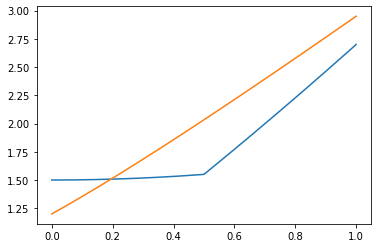

In [195]:
x=np.random.rand(Nx)
x=np.arange(Nx)/Nx
y1=1+x+0.2*x*x+np.abs(x-0.5)
y2=0.7+2*x+0.5/(x+1)

corr_y1y2=np.corrcoef(y1,y2)[0,1]
print('correlation y1 & y2=',corr_y1y2)

#plt.scatter(y1,y2)
plt.plot(x,y1)
plt.plot(x,y2)



In [196]:
err_R2=metrics.r2_score(y1,y2)
err_explain_var=metrics.explained_variance_score(y1,y2)
err_max=metrics.max_error(y1,y2)
err_MAE=metrics.mean_absolute_error(y1,y2)
err_MSE=metrics.mean_squared_error(y1,y2)
err_RMSE=metrics.mean_squared_error(y1,y2,squared=True)
err_MSElog=metrics.mean_squared_log_error(y1,y2)
err_index2=metrics.median_absolute_error(y1,y2)
err_index5=metrics.mean_absolute_percentage_error(y1,y2)
err_NashSutt=hydroeval.nse(y1,y2)
err_bias_percent=hydroeval.pbias(y1,y2)
err_MeanAbsRelErr=hydroeval.mare(y1,y2)


print('R^2',err_R2)


err_table=[
            ['max err',err_max]
           ,['MAE',err_MAE]
           ,['RMSE',err_RMSE]
           ,['MSElog',err_MSElog]
           ,['median abs err',err_index2]
           ,['mean Abs%err',err_index5]
           ,['Nash-Sutcliffe Efficiency (NSE)',err_NashSutt]
           ,['bias %',err_bias_percent]
           ,['mean abs rel err (MARE)',err_MeanAbsRelErr]
           ,['explained variance score',err_explain_var]
          ]

err_val=[err_table[i][1] for i in range(len(err_table))]

df1=pd.DataFrame(err_val)

df1.index=[err_table[i][0] for i in range(len(err_table))]

df1.columns = ['model linear']
display(df1)



R^2 0.3059167102440623


,model linear
max err,0.483333
MAE,0.288702
RMSE,0.100773
MSElog,0.011400
median abs err,0.306894
mean Abs%err,0.160208
Nash-Sutcliffe Efficiency (NSE),0.610576
bias %,11.232885
mean abs rel err (MARE),0.141072
explained variance score,0.669889
